In [1]:
# prompt: Import pandas, matplotlib and numpy as usual

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# prompt: Create a pandas dataframe with 3 columns, with names "model", "short prompt", "long prompt" with values: {model: "Mistral - 7B", "Phi-3 - 14B", "Qwen2 - 7B", "Qwen2 - 72B", "Llama 3 - 8B", "Llama 3 - 70B", "GPT-3.5", "GPT-4o", "GPT-4" }, {short prompt: 59.1, 71.0, 67.4, 78.1, 66.3, 77.4, 69.0, 77.3, 84.2}, {long prompt: 59.7, 83.5, 64.1, 93.0, 60.2, 90.9, 80.1, 88.0, 82.8}.

import pandas as pd

df = pd.DataFrame({
    'Model': ['Mistral - 7B', 'Phi-3 - 14B', 'Qwen2 - 7B', 'Qwen2 - 72B', 'Llama 3 - 8B', 'Llama 3 - 70B', 'GPT-3.5', 'GPT-4o', 'GPT-4', 'GPT-4*'],
    'Short Prompt': [59.1, 71.0, 67.4, 78.1, 66.3, 77.4, 69.0, 77.3, 84.2, 89.4],
    'Long Prompt': [59.7, 83.5, 64.1, 93.0, 60.2, 90.9, 80.1, 88.0, 82.8, 77.2]
})

# Add a new column named "Max_Acc"
df['Max_Acc'] = df[['Short Prompt', 'Long Prompt']].max(axis=1)

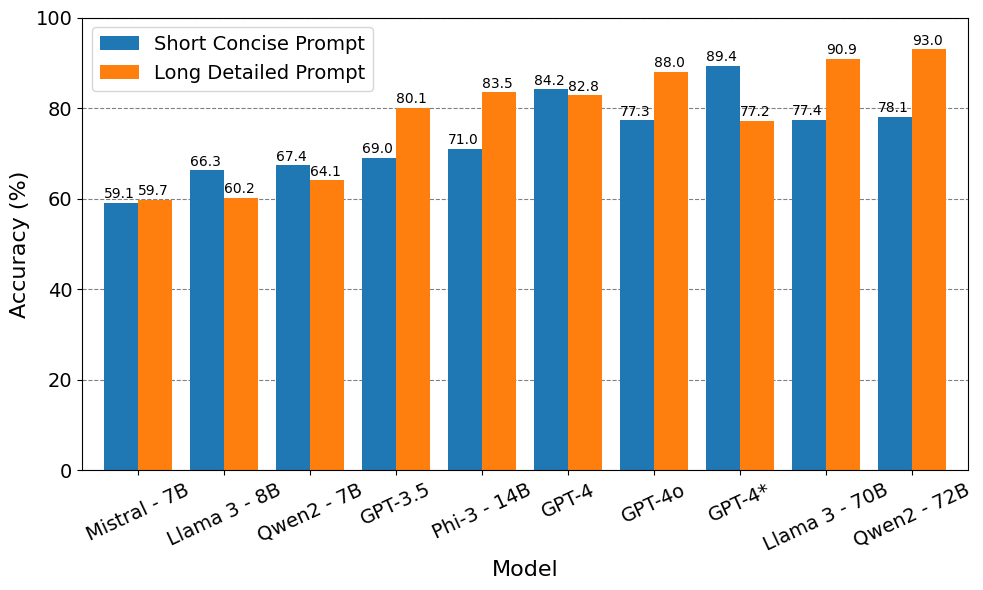

In [3]:
df_grafica = df.sort_values(by=['Max_Acc'])[['Model','Short Prompt','Long Prompt']]
df_grafica.rename(columns={"Short Prompt": "Short Concise Prompt", "Long Prompt": "Long Detailed Prompt"}, inplace=True)
#ax = df_grafica.plot(kind='bar', grid=True, figsize=(10, 6), width=0.8, yerr=[2.8583*np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 2.8583*np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])])
ax = df_grafica.plot(kind='bar', figsize=(10, 6), width=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 1))
ax.set_ylim([0,100])
plt.legend(fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize = 16)
ax.set_xlabel('Model', fontsize = 16)
ax.set_xticklabels(df_grafica['Model'], rotation=25, fontsize = 14)
plt.yticks(fontsize=14)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)
#plt.show()
plt.tight_layout()
plt.savefig("accuracy_plot.pdf")
